# Exploratory Data Analysis
In this lab, we will practice to:

 - Manipulate rows and columns of a data table by gathering and combining observations: *gather* and *spread* functions     
 - Examine the variation of single data features: histogram and density plots
 - Examine the covariation of pairs of features, i.e, the variation of a feature with respect to the other feature: box-plot
 - Examine the variation of a feature with respect to other two features: heatmap plot
 - Produce a dataset by combining multiple related ones: join functions

**NOTE:** For each dataset provided below, please refer the dataset's webpage to find information about the provided data and attributes.

## 1. Gathering Observation
In this section, we will use the ["Online News Popularity"](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) dataset.

In [1]:
# Load the required library.
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1       ✔ purrr   0.3.2  
✔ tibble  2.1.3       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Import the dataset.
news <- read_csv("OnlineNewsPopularity.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character()
)
See spec(...) for full column specifications.


In [3]:
# View the features' names, data types, and the values of some first news articles.
str(news)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	39644 obs. of  61 variables:
 $ url                          : chr  "http://mashable.com/2013/01/07/amazon-instant-video-browser/" "http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/" "http://mashable.com/2013/01/07/apple-40-billion-app-downloads/" "http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/" ...
 $ timedelta                    : num  731 731 731 731 731 731 731 731 731 731 ...
 $ n_tokens_title               : num  12 9 9 9 13 10 8 12 11 10 ...
 $ n_tokens_content             : num  219 255 211 531 1072 ...
 $ n_unique_tokens              : num  0.664 0.605 0.575 0.504 0.416 ...
 $ n_non_stop_words             : num  1 1 1 1 1 ...
 $ n_non_stop_unique_tokens     : num  0.815 0.792 0.664 0.666 0.541 ...
 $ num_hrefs                    : num  4 3 3 9 19 2 21 20 2 4 ...
 $ num_self_hrefs               : num  2 1 1 0 19 2 20 20 0 1 ...
 $ num_imgs                     : num  1 1 1 1 20 0 20 20 0 1 ...
 $ num_vi

### Example
Currently, there are 7 columns to record the weekday when the news article was published, i.e., "weekday_is_monday", ...,  "weekday_is_sunday". As each news article should only have one published weekday, this is dramatically redundant. We may avoid this by (1) gathering the 7 columns, and then (2) deleting the rows with value 0 in the new column formed by the gathering operator.


In [4]:
# Remove news articles with inconsistency with respect to the published week day.
x <- filter(news,weekday_is_monday + weekday_is_tuesday + weekday_is_wednesday + weekday_is_thursday + weekday_is_friday + weekday_is_saturday + weekday_is_sunday == 1)
# Avoid redundancy.
x <- x %>% gather("weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday", key = "weekday", value = "published_in_this_day") %>% 
    filter(published_in_this_day == 1)
str(x)
# View the remaining number of news and number of features for each news.
dim(x)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	39644 obs. of  56 variables:
 $ url                          : chr  "http://mashable.com/2013/01/07/amazon-instant-video-browser/" "http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/" "http://mashable.com/2013/01/07/apple-40-billion-app-downloads/" "http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/" ...
 $ timedelta                    : num  731 731 731 731 731 731 731 731 731 731 ...
 $ n_tokens_title               : num  12 9 9 9 13 10 8 12 11 10 ...
 $ n_tokens_content             : num  219 255 211 531 1072 ...
 $ n_unique_tokens              : num  0.664 0.605 0.575 0.504 0.416 ...
 $ n_non_stop_words             : num  1 1 1 1 1 ...
 $ n_non_stop_unique_tokens     : num  0.815 0.792 0.664 0.666 0.541 ...
 $ num_hrefs                    : num  4 3 3 9 19 2 21 20 2 4 ...
 $ num_self_hrefs               : num  2 1 1 0 19 2 20 20 0 1 ...
 $ num_imgs                     : num  1 1 1 1 20 0 20 20 0 1 ...
 $ num_videos           

[1] 39644    56

**Question: Why do we have this number of features now?**

### Exercise
Currently, there are 6 columns for recording the news' channel (e.g. tech or entertainment). Each news article can belong to multiple channels. For our task, we only consider news articles that belong to a single channel. We now create such a sub-dataset and avoid the redundancy in storing news articles' channel information.

In [5]:
# YOUR CODE HERE

# First, create a sub-dataset that only contains news articles that belong to a single channel.

# Then, remove the redundancy (similarly to the example above).

# View the remaining number of news and number of features for each news article.

## 2. Combining Observations
In this section, we will use the **S&P 500** stock dataset in one year, that can downloaded from [here](https://www.kaggle.com/camnugent/sandp500/version/2)


In [6]:
# Import the dataset.
stock <- read_csv("all_stocks_1yr.csv")

Parsed with column specification:
cols(
  Date = col_date(format = ""),
  Open = col_double(),
  High = col_double(),
  Low = col_double(),
  Close = col_double(),
  Volume = col_double(),
  Name = col_character()
)


In [7]:
# Build the statistic.
x <- mutate(stock,Year = as.integer(format(as.Date(stock$Date, format="%YYYY/%mm/%dd"),"%Y"))) %>%
    group_by(Name, Year) %>%
    summarise(avg_Volume = mean(Volume, na.rm = TRUE))
# View the statistic.
head(x,10)

Name,Year,avg_Volume
A,2016,2005638
A,2017,1921419
AAL,2016,7274368
AAL,2017,6409602
AAP,2016,1100843
AAP,2017,1377409
AAPL,2016,34085067
AAPL,2017,26871036
ABBV,2016,7290186
ABBV,2017,6027669


### Example
Produce statistics of the average traded volume of different companies by years.
This can be done by (1) computing the average of the companies by years, and then (2) spreading the "Year" column in the created table.

In [8]:
# Build the statistic.
x <- mutate(stock,Year = as.integer(format(as.Date(stock$Date, format="%YYYY/%mm/%dd"),"%Y"))) %>%
    group_by(Name, Year) %>%
    summarise(avg_Volume = mean(Volume, na.rm = TRUE)) %>%
    spread(key = Year, value = avg_Volume)
# View the statistic.
head(x,10)

Name,2016,2017
A,2005638,1921419
AAL,7274368,6409602
AAP,1100843,1377409
AAPL,34085067,26871036
ABBV,7290186,6027669
ABC,2479587,1754708
ABT,8837834,7179487
ACN,2432214,2243384
ADBE,2462956,2351964
ADI,2533864,3263293


### Exercise
Produce statistics of the average traded volume of different companies by month.

In [9]:
#YOUR CODE HERE

# Build the statistics.

# View the statistics.

## 3. Examine a single feature
In this section, we will again use the ["Online News Popularity"](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) dataset.

In [10]:
# (Re)import the dataset.
news <- read_csv("OnlineNewsPopularity.csv")

str(news)

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character()
)
See spec(...) for full column specifications.


Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	39644 obs. of  61 variables:
 $ url                          : chr  "http://mashable.com/2013/01/07/amazon-instant-video-browser/" "http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/" "http://mashable.com/2013/01/07/apple-40-billion-app-downloads/" "http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/" ...
 $ timedelta                    : num  731 731 731 731 731 731 731 731 731 731 ...
 $ n_tokens_title               : num  12 9 9 9 13 10 8 12 11 10 ...
 $ n_tokens_content             : num  219 255 211 531 1072 ...
 $ n_unique_tokens              : num  0.664 0.605 0.575 0.504 0.416 ...
 $ n_non_stop_words             : num  1 1 1 1 1 ...
 $ n_non_stop_unique_tokens     : num  0.815 0.792 0.664 0.666 0.541 ...
 $ num_hrefs                    : num  4 3 3 9 19 2 21 20 2 4 ...
 $ num_self_hrefs               : num  2 1 1 0 19 2 20 20 0 1 ...
 $ num_imgs                     : num  1 1 1 1 20 0 20 20 0 1 ...
 $ num_vi

### Example
Examine the age of the news, which is measured by "timedelta", i.e., the time difference (number of days) between the publication time of the news article and its crawl time.

In [11]:
# First, look at the min, max, mean, median, and the quantiles.
summary(news$timedelta)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.0   164.0   339.0   354.5   542.0   731.0 

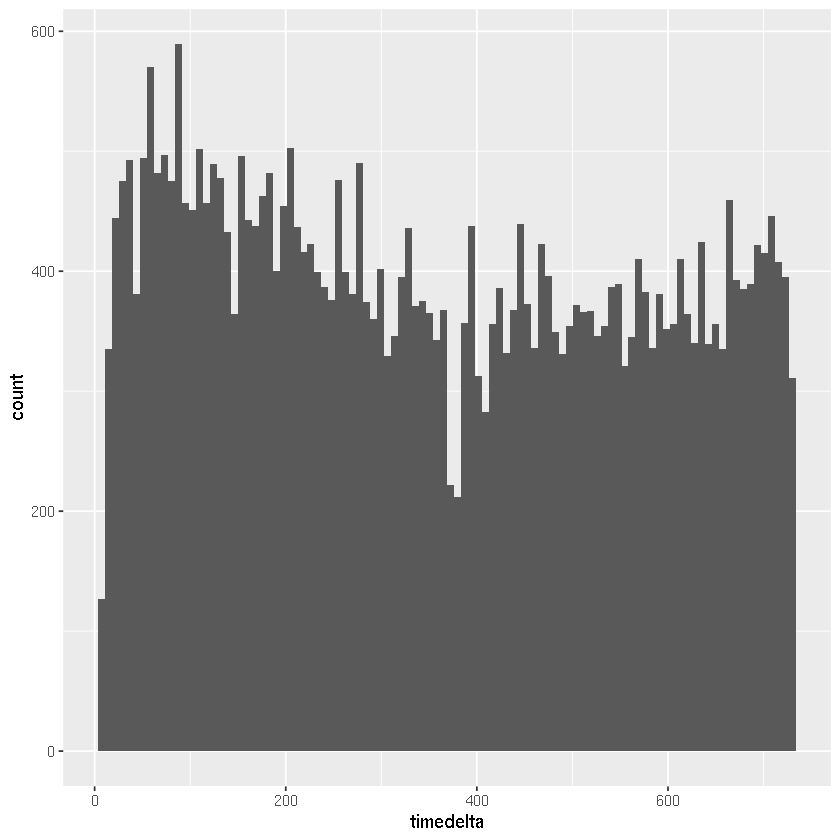

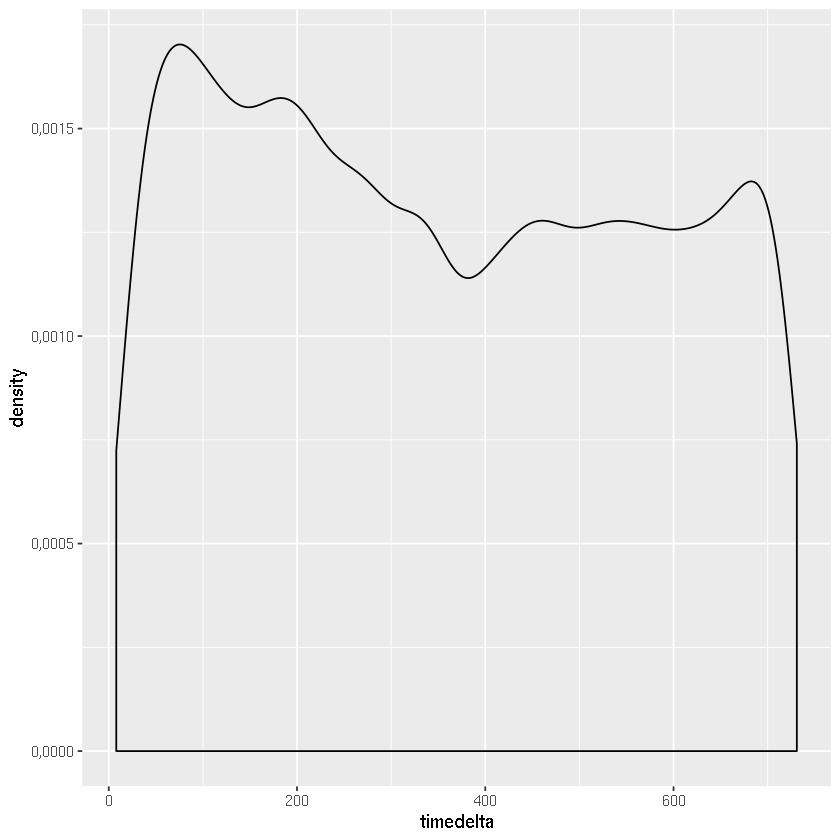

In [12]:
# Next, more insight into the title's length by plotting either:
# histogram.
ggplot(data = news, aes(x=timedelta)) + geom_histogram(bins=100)
# or density.
ggplot(data = news) + geom_density(mapping = aes(x = timedelta))

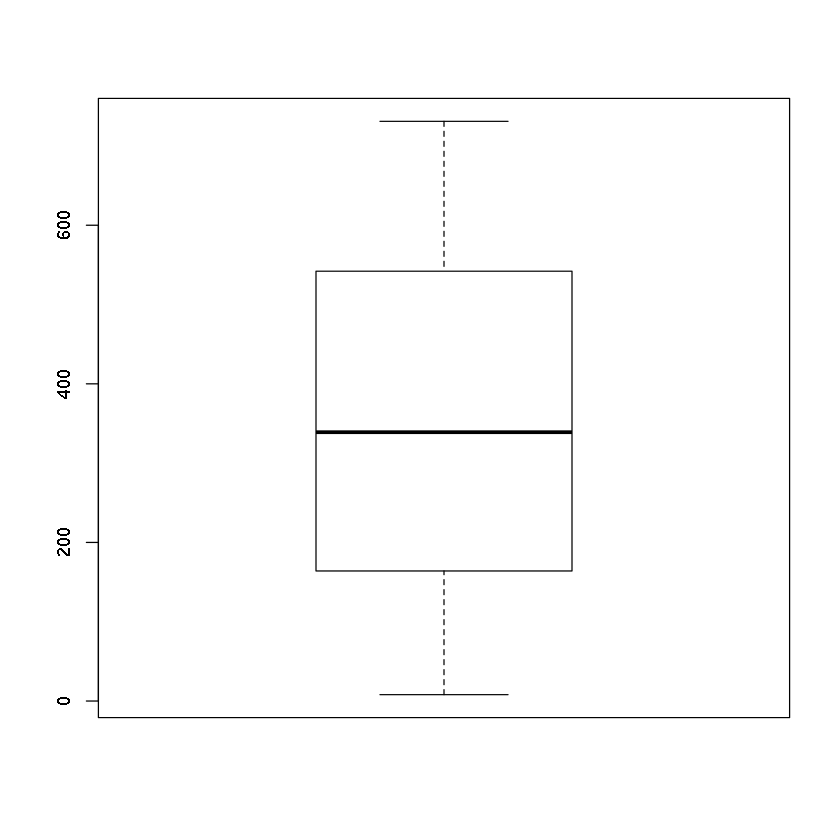

In [13]:
# Next, check if there are exceptionally old news articles by inspecting the boxplot.
boxplot(news$timedelta)

### Exercise
Examine the length of the news' title (i.e., "n_tokens_title" feature).

In [14]:
#YOUR CODE HERE

# How does the news' title vary in length?

# Is there any exceptionally short/long title? Show them.

## 4. Examine features' covariation
Again, we use the ["Online News Popularity" dataset](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity).

### Example
In this example, we will try to answer the question: Does the weekday when a news article is published affect its number of shares?
We will use a boxplot to compare the number of shares for news articles published on different weekdays.

Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	504 obs. of  3 variables:
 $ Name: chr  "A" "AAL" "AAP" "AAPL" ...
 $ 2016: num  2005638 7274368 1100843 34085067 7290186 ...
 $ 2017: num  1921419 6409602 1377409 26871036 6027669 ...
 - attr(*, "groups")=Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	504 obs. of  2 variables:
  ..$ Name : chr  "A" "AAL" "AAP" "AAPL" ...
  ..$ .rows:List of 504
  .. ..$ : int 1
  .. ..$ : int 2
  .. ..$ : int 3
  .. ..$ : int 4
  .. ..$ : int 5
  .. ..$ : int 6
  .. ..$ : int 7
  .. ..$ : int 8
  .. ..$ : int 9
  .. ..$ : int 10
  .. ..$ : int 11
  .. ..$ : int 12
  .. ..$ : int 13
  .. ..$ : int 14
  .. ..$ : int 15
  .. ..$ : int 16
  .. ..$ : int 17
  .. ..$ : int 18
  .. ..$ : int 19
  .. ..$ : int 20
  .. ..$ : int 21
  .. ..$ : int 22
  .. ..$ : int 23
  .. ..$ : int 24
  .. ..$ : int 25
  .. ..$ : int 26
  .. ..$ : int 27
  .. ..$ : int 28
  .. ..$ : int 29
  .. ..$ : int 30
  .. ..$ : int 31
  .. ..$ : int 32
  .. ..$ : int 33
  .. ..$ : int 3

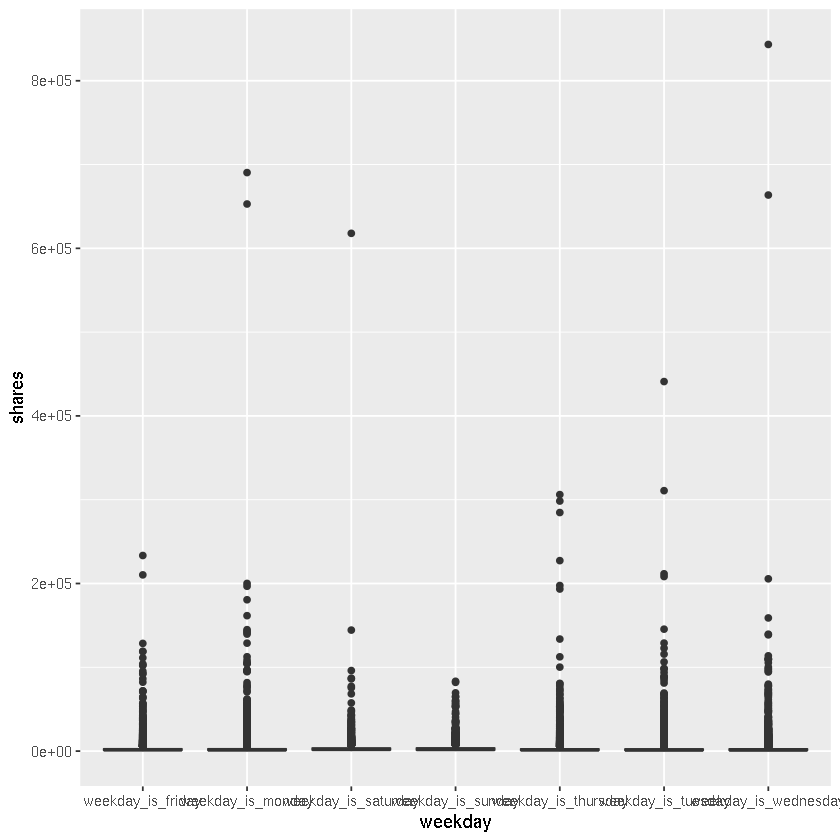

In [15]:
str(x)
# Published weekday vs number of shares.
x <- filter(news,weekday_is_monday + weekday_is_tuesday + weekday_is_wednesday + weekday_is_thursday
            + weekday_is_friday + weekday_is_saturday + weekday_is_sunday == 1) %>%
    gather("weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday", key = "weekday", value = "published_in_this_day") %>% 
    filter(published_in_this_day == 1)
str(x)
ggplot (data = x, mapping = aes(x = weekday, y = shares)) +
    geom_boxplot()

Warning message:
“Removed 2185 rows containing non-finite values (stat_boxplot).”

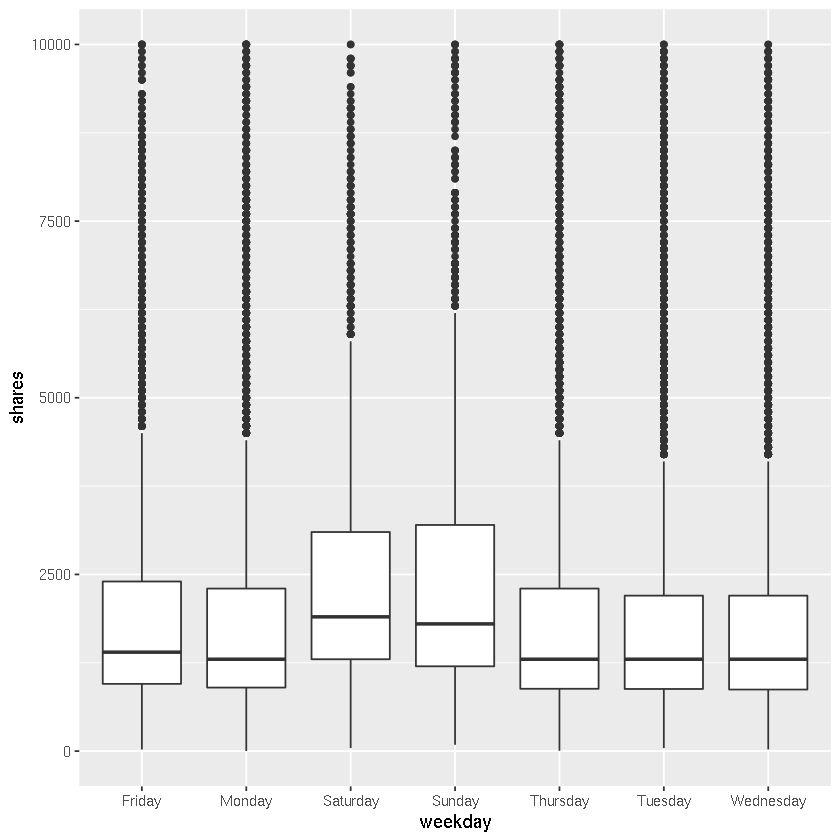

In [16]:
# A better box-plot:
x$weekday[x$weekday == "weekday_is_monday"] <- "Monday"
x$weekday[x$weekday == "weekday_is_tuesday"] <- "Tuesday"
x$weekday[x$weekday == "weekday_is_wednesday"] <- "Wednesday"
x$weekday[x$weekday == "weekday_is_thursday"] <- "Thursday"
x$weekday[x$weekday == "weekday_is_friday"] <- "Friday"
x$weekday[x$weekday == "weekday_is_saturday"] <- "Saturday"
x$weekday[x$weekday == "weekday_is_sunday"] <- "Sunday"
ggplot (data = x, mapping = aes(x = weekday, y = shares)) +
    geom_boxplot()+
     scale_y_continuous(limits = c(0, 10000))

**Which conclusion can you make based on the above box-plot?**

### Exercise
Examine the dataset to answer the question: Does the topic of a news article affect its number of shares? Similarly, what about the article length (i.e., "n_tokens_content" feature) and sentimal polarity (i.e., "global_sentiment_polarity" feature)?

In [17]:
# YOUR CODE HERE

# First, create a sub-dataset that contains only news that belong to a single channel.

# Then, remove the redundancy as similar to the example above.

# Improve features names.

# Now, draw the boxplots.

# Article length:

# Sentiment polarity:

**Which conclusion can you make based on the above box-plots?**

## 5. Examining the variation of a feature with respect to two other features
In this section, we will use the ["Census Income"](https://archive.ics.uci.edu/ml/datasets/census+income) dataset.

In [18]:
# Import the dataset (note the argument strip.white=TRUE).
incomes <- read.csv("adult.data", header = FALSE, strip.white=TRUE)

# In this dataset, the columns do not have names yet. Therefore, we name the columns for easier reference.
# The columns are named according to the attribute information provided on the dataset's webpage.
col_headers <- c("age", "workclass", "fnlwgt","education", "education-num","marital-status","occupation","relationship",
                "race","sex","capital-gain","capital-loss","hours-per-week","native-country","income")
names(incomes) <- col_headers
# View the datset after naming the columns.
incomes

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [19]:
# Currently, the income column consists of two string values:
unique(incomes$income)
str(incomes)

[1] <=50K >50K 
Levels: <=50K >50K

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education-num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital-status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital-gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital-loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours-per-week: int  40 1

In [20]:
# To allow numerical operations, we create a new column with value *0* or *1*, respectively
x <- mutate(incomes, exceed_50K = ifelse(income =="<=50K",0,1))
# Now view x and pay attention to the "income" and "exceed_50K" columns.
head(x)

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,exceed_50K
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0


### Example
Are men working in public sector (i.e., workclass is "Federal-gov" or "Local-gov") more likely to have an income that exceeds 50K than in the private sector, and also more likely than women working in the same sector?

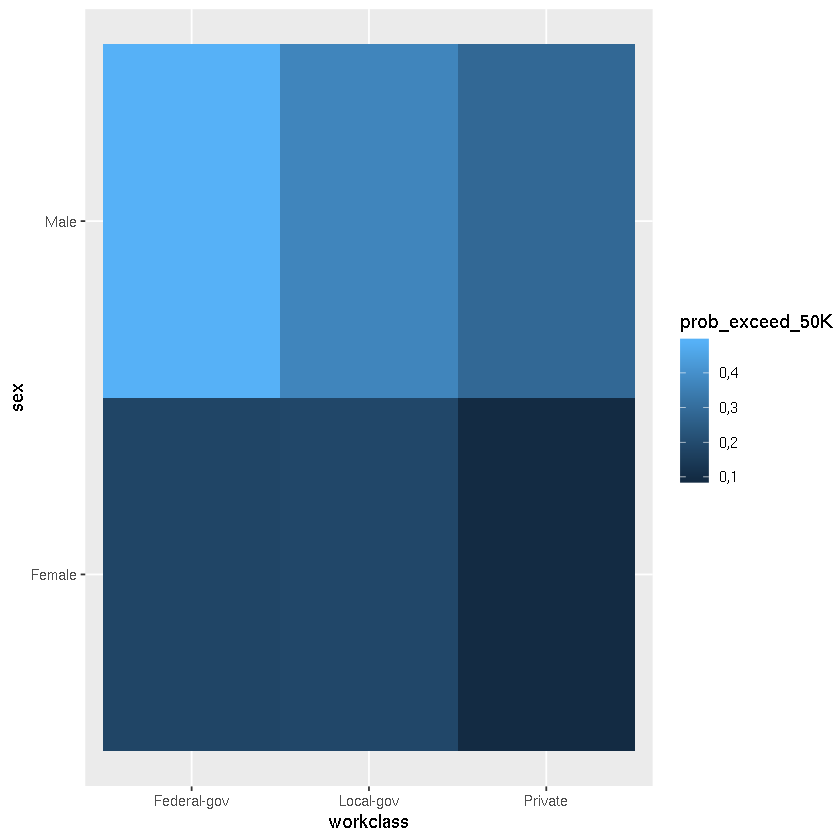

In [21]:
# Create a dataset of people grouped by working class and sex, with mean probability of income > 50K.
y <- filter(x,workclass %in% c("Federal-gov", "Local-gov", "Private" )) %>%
    group_by(workclass, sex) %>%
    summarise(prob_exceed_50K = mean(exceed_50K, na.rm = TRUE))

# Plot a heat map with tiles.
ggplot(data = y, aes(x = workclass, y = sex)) + 
    geom_tile(aes(fill = prob_exceed_50K))

**Which conclusion you can make based on the above heat map?**

### Exercise
Are white people with higher education (i.e., education is "Bachelors" or "Masters") more likely to have an income that exceeds 50K than those with lower education (i.e., education is "HS-grad"), and also more likely than other races with the same level of education?

In [22]:
# YOUR CODE HERE

# Create a dataset of people grouped by education and race, with mean probability of income > 50K.

# Plot a heat map with tiles.

**Which conclusion you can make based on the above heat map?**

## 6. Combining related datasets
In this section, we will use the "nycflights13" dataset.

In [23]:
# Load the library that contains the dataset.
library(nycflights13)

## Example
In this example, we will try to find if there is any correlation between the planes' age and their delays: Are flights with older planes more likely be delayed?

In [24]:
# Install the package for datetime processing if needed.
install.packages("lubridate",repos = "https://cran.uni-muenster.de/")
# Load the library.
library(lubridate)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [25]:
# Produce a table that consists of 3 columns: the airplanes' age, the number of fligts, and the likelihood that a flight with plane of that age is delayed
delays <- flights %>% select(dep_delay, tailnum) %>% 
            left_join (select(planes, tailnum, year), by = "tailnum") %>%
            mutate(age = year(now()) - year) %>%
            filter(is.na(dep_delay) == FALSE & is.na(age) == FALSE) %>%
            group_by(age) %>%
            summarise(count = n(), delayed_prop = sum(dep_delay>0)/ n())

# View the new dataset.
head(delays,10)

# Now, compute the correlation.
cor(delays$age, delays$delayed_prop)

age,count,delayed_prop
6,4621,"0,3962346"
7,7214,"0,4114222"
8,6017,"0,3874024"
9,3777,"0,4278528"
10,6584,"0,3900365"
11,17809,"0,4156887"
12,15207,"0,3933057"
13,13030,"0,4311589"
14,14112,"0,4143991"
15,15339,"0,4359476"


[1] -0,2612169

**Which conclusion can you can make based on this correlation?**

## Exercise
Examine the correlation between weather and delays: Are flights on days with bad weather more likely be delayed?

In [26]:
#YOUR CODE HERE

# We will measure the goodness of weather by the visibility in miles (the "visib" column of weather table).
# Produce a table that consists of 3 columns: the visibility, the number of flights and the likelihood that a flight with that visibility is delayed

# View the new dataset.

# Now, compute the correlation.

## References

[Plots for Exploratory Data Analysis: Engineering Statistics](http://www.itl.nist.gov/div898/handbook/eda/eda.htm)

[Exploratory Data Analysis using R: R for Data Science](http://r4ds.had.co.nz/data-import.html)